<a href="https://colab.research.google.com/github/immortalRegis/Data-Analysis/blob/main/SQL_and_Python_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We perform an analysis of a company's customer loyalty program using SQL and python.

In [80]:
import pandas as pd
from pandasql import sqldf


In [83]:
df = pd.read_excel(r'/content/customer file.xlsx')


We perform some exploratory analysis of the dataset

In [84]:
df.columns

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'Order Year', 'Quarter', 'MonthsAsMember', 'LoyaltyStatus',
       'Product Line', 'Coupon Response', 'Count', 'Quantity Sold',
       'Unit Sale Price', 'Unit Cost', 'Revenue', 'Customer Lifetime Value',
       'Loyalty Count'],
      dtype='object')

In [85]:
df.isna().sum()

Loyalty#                   0
First Name                 0
Last Name                  0
Customer Name              0
Country                    0
Province or State          0
City                       0
Latitude                   5
Longitude                  5
Postal code                0
Gender                     0
Education                  0
Location Code              0
Income                     0
Marital Status             0
Order Year                 0
Quarter                    0
MonthsAsMember             0
LoyaltyStatus              0
Product Line               0
Coupon Response            0
Count                      0
Quantity Sold              0
Unit Sale Price            0
Unit Cost                  0
Revenue                    0
Customer Lifetime Value    0
Loyalty Count              0
dtype: int64

We drop some columns that are not used in the analysis.

In [86]:
df.drop(['Longitude', 'Latitude', 'First Name', 'Last Name'], axis = 1)

,Loyalty#,Customer Name,Country,Province or State,City,Postal code,Gender,Education,Location Code,Income,...,LoyaltyStatus,Product Line,Coupon Response,Count,Quantity Sold,Unit Sale Price,Unit Cost,Revenue,Customer Lifetime Value,Loyalty Count
0,837810,Abigail Goris,Canada,British Columbia,Dawson Creek,U5I 4F1,male,Bachelor,Rural,42142,...,Bronze,Computers and Home Office,Coupon 6,1,3,1182,1004.70,3546,8842.65,1
1,707928,Ada Glaude,Germany,Bremen,Bremen,28759,male,High School or Below,Rural,20978,...,Bronze,Computers and Home Office,Coupon 1,1,1,434,368.90,434,3508.57,1
2,901442,Ada Staback,Canada,Manitoba,Winnipeg,R2C 0M5,female,Bachelor,Rural,71391,...,Bronze,Computers and Home Office,Coupon 1,1,2,201,170.85,402,8044.87,1
3,237303,Adam Boner,Canada,Ontario,Sudbury,M5V 1G5,female,Bachelor,Urban,79674,...,Bronze,Computers and Home Office,Coupon 4,1,3,757,643.45,2271,8660.84,1
4,348835,Adam Dunnegan,Canada,Manitoba,Winnipeg,R2C 0M5,male,Master,Urban,13663,...,Bronze,Computers and Home Office,Coupon 1,1,2,161,136.85,322,25464.82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68348,434631,Yaeko Thorp,United Kingdom,Reading,Ilkley Road,RG4 7BD,female,College,Rural,0,...,Gold,Photography,Coupon 1,1,2,372,316.20,744,3223.22,1
68349,727126,Yer Noyola,Germany,Berlin,Berlin,10711,male,College,Suburban,0,...,Elite,Photography,Coupon 2,1,2,119,101.15,238,2161.69,1
68350,355048,Yolande Boudrieau,United Kingdom,Greater London,London,E7 8EZ,male,Bachelor,Suburban,48675,...,Elite,Photography,Coupon 1,1,2,374,317.90,748,2798.83,1
68351,936010,Yulanda Lile,Canada,Ontario,Toronto,P5S 6R4,female,Bachelor,Urban,51425,...,Elite,Photography,Coupon 1,1,4,412,350.20,1648,9378.90,1


We create a helper function to select the variable type to be passed into the sqldf function

In [78]:
def sqldf_helper(q: str):
  return sqldf(q, globals())

In [79]:
q = "SELECT * FROM df LIMIT 5;"
print(sqldf_helper(q))

   Loyalty# First Name Last Name  Customer Name  Country Province or State  \
0    837810    Abigail     Goris  Abigail Goris   Canada  British Columbia   
1    707928        Ada    Glaude     Ada Glaude  Germany            Bremen   
2    901442        Ada   Staback    Ada Staback   Canada          Manitoba   
3    237303       Adam     Boner     Adam Boner   Canada           Ontario   
4    348835       Adam  Dunnegan  Adam Dunnegan   Canada          Manitoba   

           City   Latitude   Longitude Postal code  ... LoyaltyStatus  \
0  Dawson Creek  55.759627 -120.237662     U5I 4F1  ...        Bronze   
1        Bremen  53.079296    8.801694       28759  ...        Bronze   
2      Winnipeg  49.895136  -97.138374     R2C 0M5  ...        Bronze   
3       Sudbury  46.522099  -80.953035     M5V 1G5  ...        Bronze   
4      Winnipeg  49.895136  -97.138374     R2C 0M5  ...        Bronze   

                Product Line Coupon Response  Count Quantity Sold  \
0  Computers and Home O

Run a query to see the distribution of the recipients by country.

In [87]:
q2 = """
  SELECT country, count(*) as "total number" FROM df
  GROUP BY country
  ORDER BY "total number" DESC
"""

In [89]:
print(sqldf_helper(q2))

          Country  total number
0   United States         17879
1          Canada         17602
2  United Kingdom         16896
3         Germany         15976


We plot the distribution information in a bar chart

<Axes: title={'center': 'Customer Distribution by Country'}>

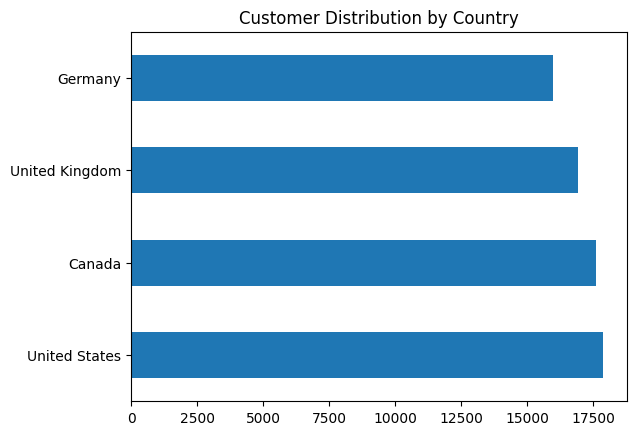

In [94]:
df['Country'].value_counts().plot(kind = 'barh', title = 'Customer Distribution by Country')

In [98]:
q3 = """ 
  SELECT LoyaltyStatus, COUNT(*) AS Total, ROUND(AVG(income), 2) AS "Average Income per Group (USD$)"FROM df
  GROUP BY LoyaltyStatus
  ORDER BY "Average Income per Group (USD$)";
"""
print(sqldf_helper(q3))

  LoyaltyStatus  Total  Average Income per Group (USD$)
0      Platinum  11683                         37305.53
1          Gold  11578                         37542.17
2        Bronze  11618                         37585.85
3         Elite  11185                         37679.64
4           VIP  10936                         37923.55
5        Silver  11353                         38038.18
